<a href="https://colab.research.google.com/github/microprediction/winning/blob/main/dilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Explains https://github.com/microprediction/winning/blob/main/winning/lattice.py, or part thereof
# Article at https://medium.com/@mike.roweprediger/how-to-move-a-discrete-density-from-one-unit-size-to-another-27d4ffeab036


import math

def implied_L(density):
    return int((len(density) - 1) / 2)

def _low_high(offset):
    """ Represent a float offset as combination of two discrete ones """
    l = math.floor(offset)
    u = math.ceil(offset)
    r = offset - l
    return (l, 1 - r), (u, r)

def dilate_density(density, unit_ratio=2):
    """ Represent density on a new lattice with a larger unit size 
    :param density: 
    :param L: 
    :param unit_ratio:  e.g. if 2 the new density will be skinnier 
                        e.g. if 0.5, the new density will be fatter 
    :return: 
    """
    L = implied_L(density)
    x = list(range(-L,L+1))  
    low_highs = [ _low_high(xi / unit_ratio) for xi in x]
    dilated_density = [0 for _ in range(2 * L + 1)]
    mass = 0
    for lh, p in zip(low_highs, density):
        for (lc, wght) in lh:
            rel_loc = min(2 * L, max(lc + L, 0))
            mass += p*wght
            dilated_density[rel_loc] += p*wght
    total_mass = sum(dilated_density)
    return [d / total_mass for d in dilated_density]


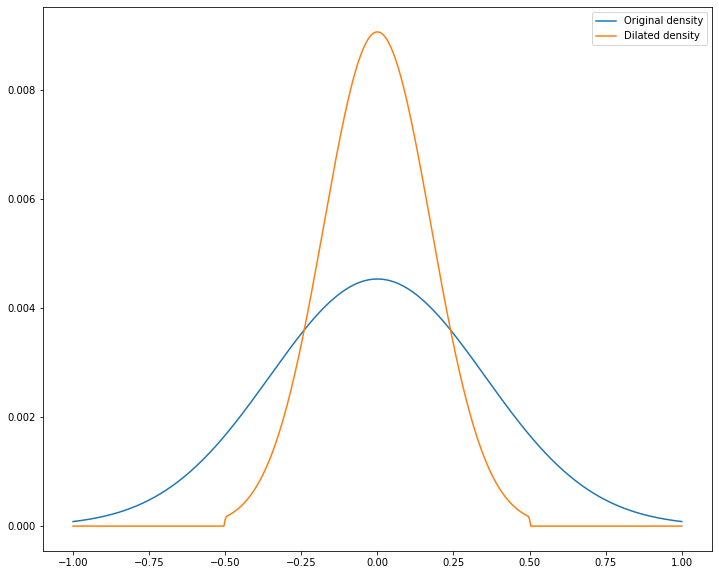

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 10.0]

# Plot your data here using plt.plot() or other plotting functions


# Define the original density on an evenly spaced lattice
L = 250
x = np.linspace(-1, 1, 2*L+1)
f = np.exp(-4*x**2)
f = f/sum(f)

# Dilate the density with a unit_ratio of 0.5
f_dilated = dilate_density(f, unit_ratio=2)

# Plot the original and dilated densities
plt.plot(x, f, label='Original density')
plt.plot(x, f_dilated, label='Dilated density')
plt.legend()
plt.show()
